In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew

In [4]:
ipl_df = pd.read_csv('~/Desktop/data/ipl2023database.csv')

In [5]:
ipl_df.head()

,Match Number,Date,Venue,Team1,Team2,Toss winning team,Toss Decision,First batting team,Second batting team,First Innings Score,Overs in First innings,Second Innings Score,Overs in Second innings,Winning Team,Won By
0,63,"16th May 2023, Tuesday",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Mumbai Indians,Lucknow Super Giants,MI,bowl,LSG,MI,177/3,20.0,172/5,20.0,Lucknow Super Giants,5 runs.
1,62,"15th May 2023, Monday","Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Sunrisers Hyderabad,SRH,bowl,GT,SRH,188/9,20.0,154/9,20.0,Gujarat Titans,34 runs.
2,61,"14th May 2023, Sunday","MA Chidambaram Stadium, Chennai",Chennai Super Kings,Kolkata Knight Riders,CSK,bat,CSK,KKR,144/6,20.0,147/4,18.3,Kolkata Knight Riders,6 wickets
3,60,"14th May 2023, Sunday","Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Royal Challengers Bangalore,RCB,bat,RCB,RR,171/5,20.0,59/10,10.3,Royal Challengers Bangalore,112 runs.
4,59,"13th May 2023, Saturday","Arun Jaitley Stadium, Delhi",Delhi Capitals,Punjab Kings,DC,bowl,PBKS,DC,167/7,20.0,136/8,20.0,Punjab Kings,31 runs.


In [6]:
column= ipl_df.columns

In [7]:
column

Index(['Match Number', 'Date', 'Venue', 'Team1', 'Team2', 'Toss winning team',
       'Toss Decision', 'First batting team', 'Second batting team',
       'First Innings Score', 'Overs in First innings', 'Second Innings Score',
       'Overs in Second innings', 'Winning Team', 'Won By'],
      dtype='object')

In [8]:
ipl_df.shape

(63, 15)

In [9]:
len(ipl_df.columns)

15

In [10]:
ipl_df.describe()

,Match Number,Overs in First innings,Overs in Second innings
count,63.000000,63.000000,62.000000
mean,32.000000,19.938095,18.832258
std,18.330303,0.336216,1.942347
min,1.000000,17.500000,10.300000
25%,16.500000,20.000000,18.225000
50%,32.000000,20.000000,20.000000
75%,47.500000,20.000000,20.000000
max,63.000000,20.000000,20.000000


In [11]:
ipl_df.dtypes


Match Number                 int64
Date                        object
Venue                       object
Team1                       object
Team2                       object
Toss winning team           object
Toss Decision               object
First batting team          object
Second batting team         object
First Innings Score         object
Overs in First innings     float64
Second Innings Score        object
Overs in Second innings    float64
Winning Team                object
Won By                      object
dtype: object

In [12]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match Number             63 non-null     int64  
 1   Date                     63 non-null     object 
 2   Venue                    63 non-null     object 
 3   Team1                    63 non-null     object 
 4   Team2                    63 non-null     object 
 5   Toss winning team        63 non-null     object 
 6   Toss Decision            63 non-null     object 
 7   First batting team       63 non-null     object 
 8   Second batting team      63 non-null     object 
 9   First Innings Score      63 non-null     object 
 10  Overs in First innings   63 non-null     float64
 11  Second Innings Score     62 non-null     object 
 12  Overs in Second innings  62 non-null     float64
 13  Winning Team             63 non-null     object 
 14  Won By                   62 

In [13]:
ipl_df.dropna(inplace=True)


In [14]:

le = LabelEncoder()
for col in ipl_df.select_dtypes(include=['object']):
  ipl_df[col] = le.fit_transform(ipl_df[col])



In [15]:
ipl_df.fillna(ipl_df.median(), inplace=True)  


In [16]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match Number             62 non-null     int64  
 1   Date                     62 non-null     int64  
 2   Venue                    62 non-null     int64  
 3   Team1                    62 non-null     int64  
 4   Team2                    62 non-null     int64  
 5   Toss winning team        62 non-null     int64  
 6   Toss Decision            62 non-null     int64  
 7   First batting team       62 non-null     int64  
 8   Second batting team      62 non-null     int64  
 9   First Innings Score      62 non-null     int64  
 10  Overs in First innings   62 non-null     float64
 11  Second Innings Score     62 non-null     int64  
 12  Overs in Second innings  62 non-null     float64
 13  Winning Team             62 non-null     int64  
 14  Won By                   62 non-n

In [17]:
total_runs_per_inning = (
    ipl_df.groupby(['Match Number', 'Date'])['Won By'].sum().reset_index()
)


In [18]:
total_runs_per_inning 

,Match Number,Date,Won By
0,1,32,20
1,2,17,26
2,3,17,21
3,4,29,29
4,5,29,31
...,...,...,...
57,59,7,14
58,60,9,2
59,61,9,25
60,62,11,16


In [19]:
x = ipl_df.iloc[:, 1:-1].values  
y = ipl_df.iloc[:, -1].values    


In [20]:
x

array([[13. ,  2. ,  5. ,  4. ,  5. ,  1. ,  4. ,  5. , 26. , 20. , 32. ,
        20. ,  4. ],
       [11. ,  6. ,  2. , 10. ,  9. ,  1. ,  2. ,  9. , 33. , 20. , 24. ,
        20. ,  2. ],
       [ 9. ,  5. ,  0. ,  3. ,  0. ,  0. ,  0. ,  3. ,  9. , 20. , 18. ,
        18.3,  3. ],
       [ 9. ,  9. ,  7. ,  8. ,  7. ,  0. ,  7. ,  8. , 19. , 20. , 58. ,
        10.3,  8. ],
       [ 7. ,  0. ,  1. ,  6. ,  1. ,  1. ,  6. ,  1. , 17. , 20. ,  8. ,
        20. ,  6. ],
       [ 7. ,  8. , 10. ,  4. ,  9. ,  0. ,  9. ,  4. , 31. , 20. , 41. ,
        19.2,  4. ],
       [ 5. , 10. ,  5. ,  2. ,  2. ,  1. ,  5. ,  2. , 55. , 20. , 46. ,
        20. ,  5. ],
       [ 3. ,  3. ,  3. ,  7. ,  8. ,  1. ,  3. ,  8. , 11. , 20. , 20. ,
        13.1,  7. ],
       [ 1. ,  5. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. , 18. , 20. , 12. ,
        20. ,  0. ],
       [45. , 10. ,  5. ,  8. ,  5. ,  1. ,  7. ,  5. , 41. , 20. , 48. ,
        16.3,  5. ],
       [43. ,  3. ,  3. ,  6. ,  6. ,  0. ,  6. , 

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [23]:
x_train

array([[ 1.20713639e+00, -1.70003160e+00, -1.13314768e+00,
         1.13663528e+00,  7.78216124e-01, -1.50437957e+00,
         8.34513651e-01, -1.17711458e+00,  9.23521676e-04,
         1.54959329e-01,  8.28110219e-01, -1.26244860e+00,
        -1.19384916e+00],
       [-2.48346382e-01, -5.82565344e-02, -1.45690416e+00,
         2.13387188e+00, -1.45851101e+00,  6.64725857e-01,
         1.53845714e+00, -1.52630646e+00, -1.43053508e+00,
         1.54959329e-01, -1.16237592e+00, -2.24360891e-01,
        -1.55847305e+00],
       [-3.24950739e-01, -1.70003160e+00, -1.13314768e+00,
        -5.25425741e-01, -1.13897857e+00,  6.64725857e-01,
        -5.73373325e-01, -1.17711458e+00, -1.54505176e+00,
         1.54959329e-01, -1.45509447e+00,  1.90874191e-01,
        -1.19384916e+00],
       [-1.09099431e+00,  1.25516351e+00,  8.09391201e-01,
         1.13663528e+00,  7.78216124e-01, -1.50437957e+00,
         8.34513651e-01,  1.26722861e+00, -6.28918261e-01,
         1.54959329e-01,  1.64772216e

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_lr = lr.predict(x_test)


In [28]:
y_pred_lr

array([18.31720108, 24.15832245, 17.41540255, 14.56617019, 12.66942759,
       10.00827748, 15.41255692, 25.84989914, 15.41821281, 22.81102731,
       11.37153814, 16.97410482, 15.23004382])

In [29]:
lr_mse = mean_squared_error(y_test, y_pred_lr)


In [30]:
lr_mse

158.05817102065873

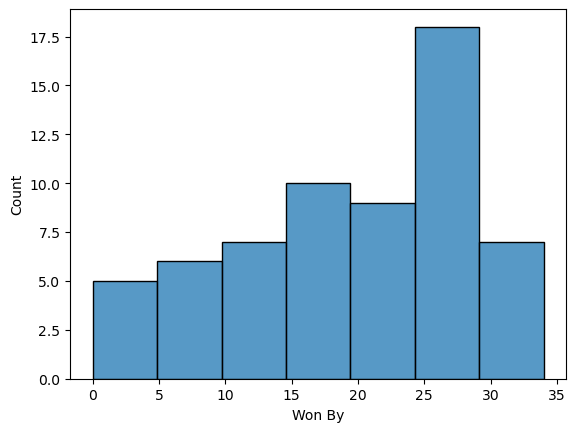

In [31]:
sns.histplot(ipl_df['Won By'])
plt.show()


In [32]:
team_win_counts = ipl_df['Winning Team'].value_counts()


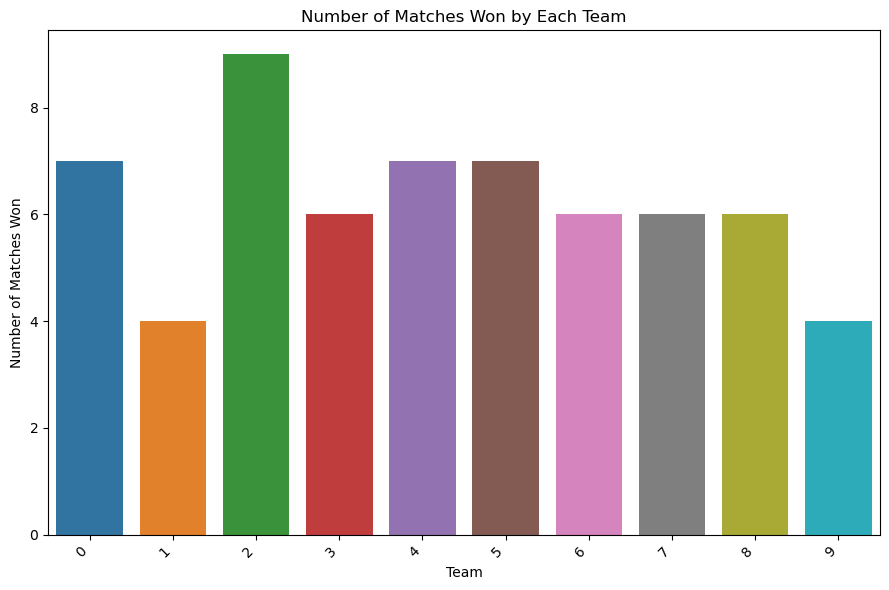

In [33]:
plt.figure(figsize=(9, 6))
sns.barplot(x=team_win_counts.index, y=team_win_counts.values)
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

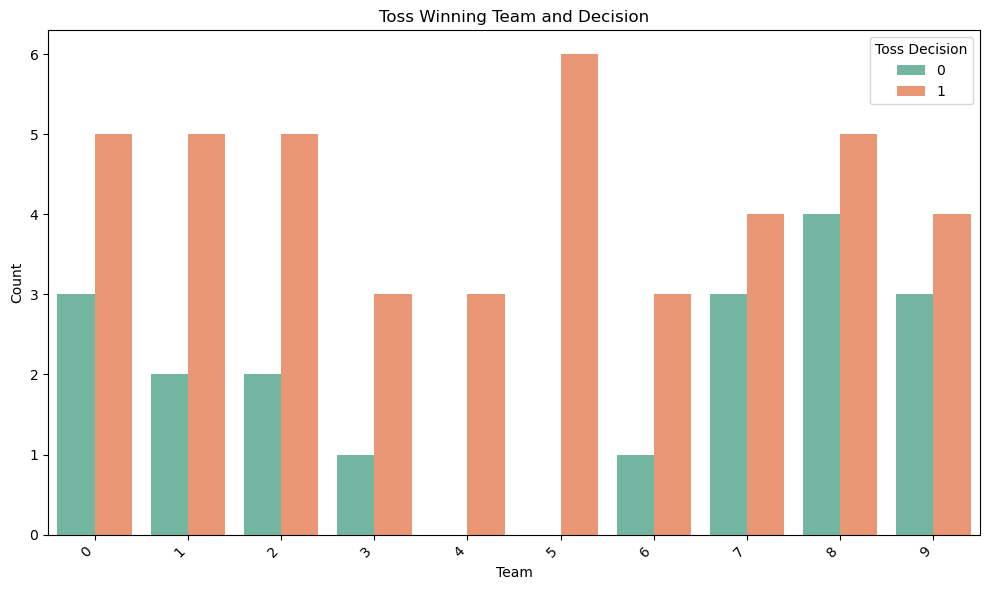

In [35]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Toss winning team', hue='Toss Decision', data=ipl_df, palette='Set2')
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Toss Winning Team and Decision')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

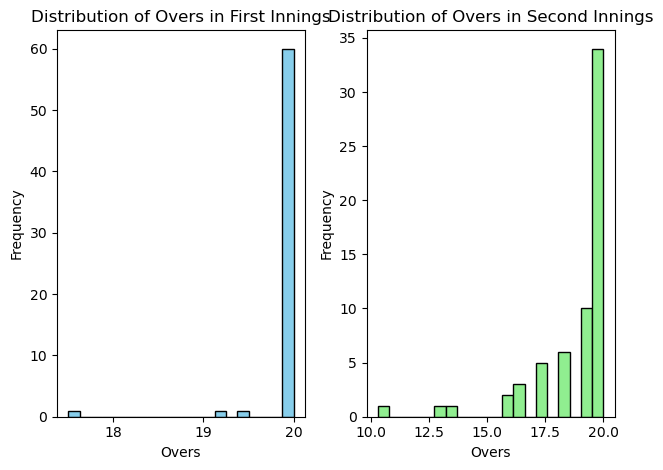

In [66]:
plt.subplot(1, 2, 1)
plt.hist(ipl_df['Overs in First innings'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Distribution of Overs in First Innings')

plt.subplot(1, 2, 2)
plt.hist(ipl_df['Overs in Second innings'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Distribution of Overs in Second Innings')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

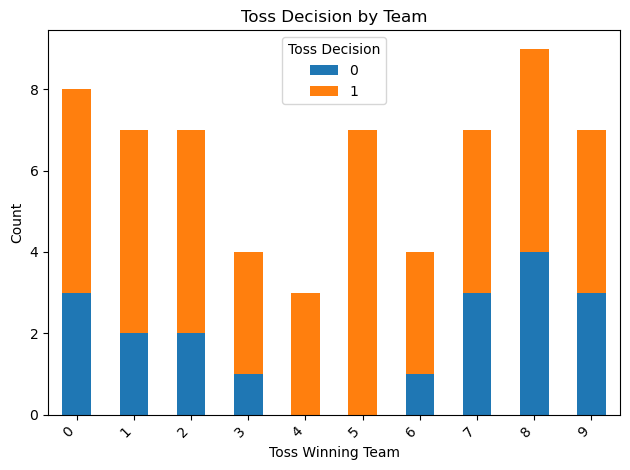

In [63]:
toss_decision_counts =ipl_df.groupby(['Toss winning team', 'Toss Decision']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
toss_decision_counts.plot(kind='bar', stacked=True)
plt.xlabel('Toss Winning Team')
plt.ylabel('Count')
plt.title('Toss Decision by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

In [58]:
grouped_data = ipl_df.groupby(['First Innings Score', 'Overs in First innings', 'Second Innings Score', 'Overs in Second innings']).size().reset_index(name='Count')


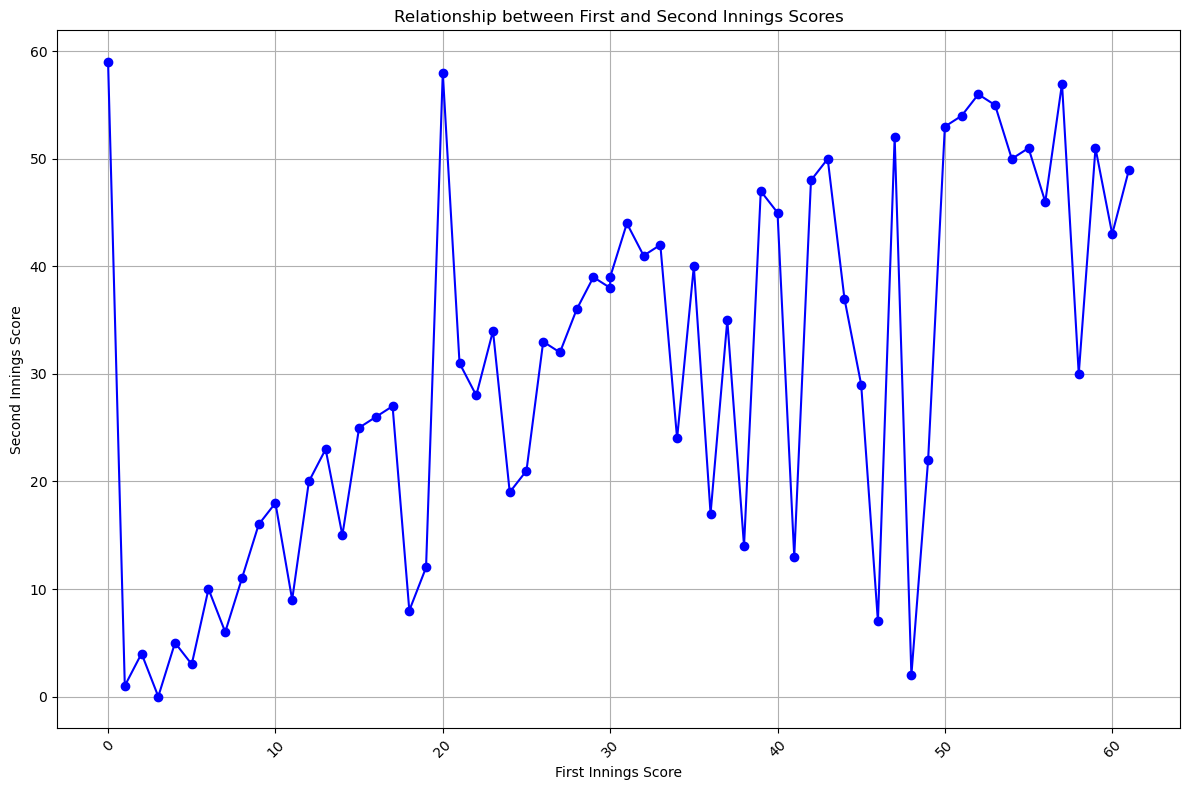

In [59]:
plt.figure(figsize=(12, 8))  
plt.plot(grouped_data['First Innings Score'], grouped_data['Second Innings Score'], marker='o', linestyle='-', color='b')
plt.xlabel('First Innings Score')
plt.ylabel('Second Innings Score')
plt.title('Relationship between First and Second Innings Scores')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

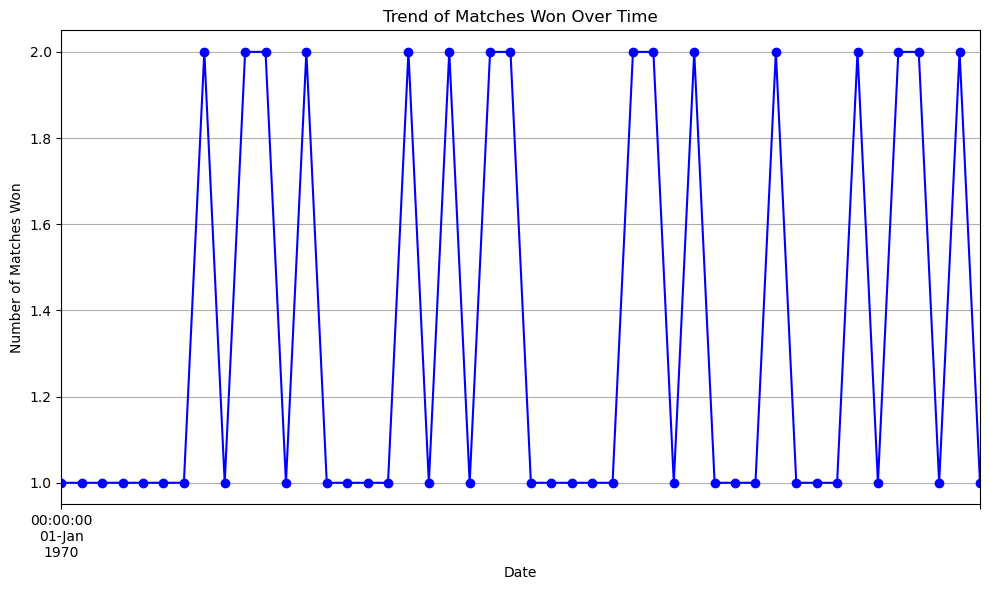

In [74]:
# Convert 'Date' column to datetime
ipl_df['Date'] = pd.to_datetime(ipl_df['Date'])

# Group by date and count the number of matches won on each date
matches_won_by_date = ipl_df.groupby('Date')['Winning Team'].count()

# Plotting the trend of matches won over time
plt.figure(figsize=(10, 6))
matches_won_by_date.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Trend of Matches Won Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches Won')
plt.grid(True)
plt.tight_layout()
plt.show()
